In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
country = pd.read_csv('country_data.csv')
country.head()

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
4,Antigua and Barbuda,75.05625,9759.305728


In [3]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          158 non-null    object 
 1   Life Expectancy  158 non-null    float64
 2   GDP              158 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.8+ KB


In [4]:
life_expectancy = country['Life Expectancy']

In [5]:
life_expectancy

,Life Expectancy
0,58.19375
1,75.15625
2,73.61875
3,49.01875
4,75.05625
...,...
153,76.07500
154,68.03125
155,71.38750
156,53.90625


In [6]:
life_expectancy.describe()

,Life Expectancy
count,158.000000
mean,69.248510
std,9.350804
min,46.112500
25%,62.325000
50%,72.525000
75%,75.442187
max,82.537500


In [7]:
# Find the Quantiles
# 3.
# We can now use NumPy functions on that column! Let’s use the np.quantile() function to find the quartiles of life_expectancy. Store the result in a variable named life_expectancy_quartiles and print the results.
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print(life_expectancy_quartiles)

[62.325     72.525     75.4421875]


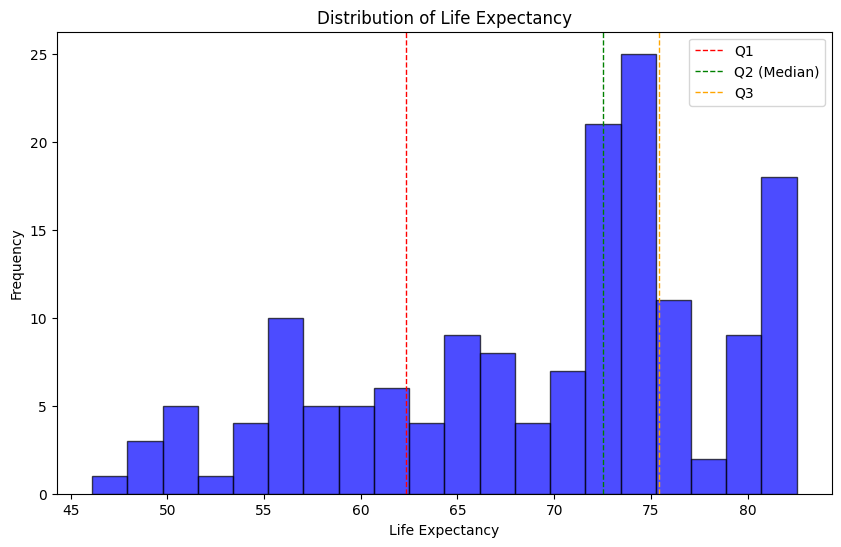

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(life_expectancy, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.axvline(life_expectancy_quartiles[0], color='red', linestyle='dashed', linewidth=1, label='Q1')
plt.axvline(life_expectancy_quartiles[1], color='green', linestyle='dashed', linewidth=1, label='Q2 (Median)')
plt.axvline(life_expectancy_quartiles[2], color='orange', linestyle='dashed', linewidth=1, label='Q3')
plt.legend()
plt.show()

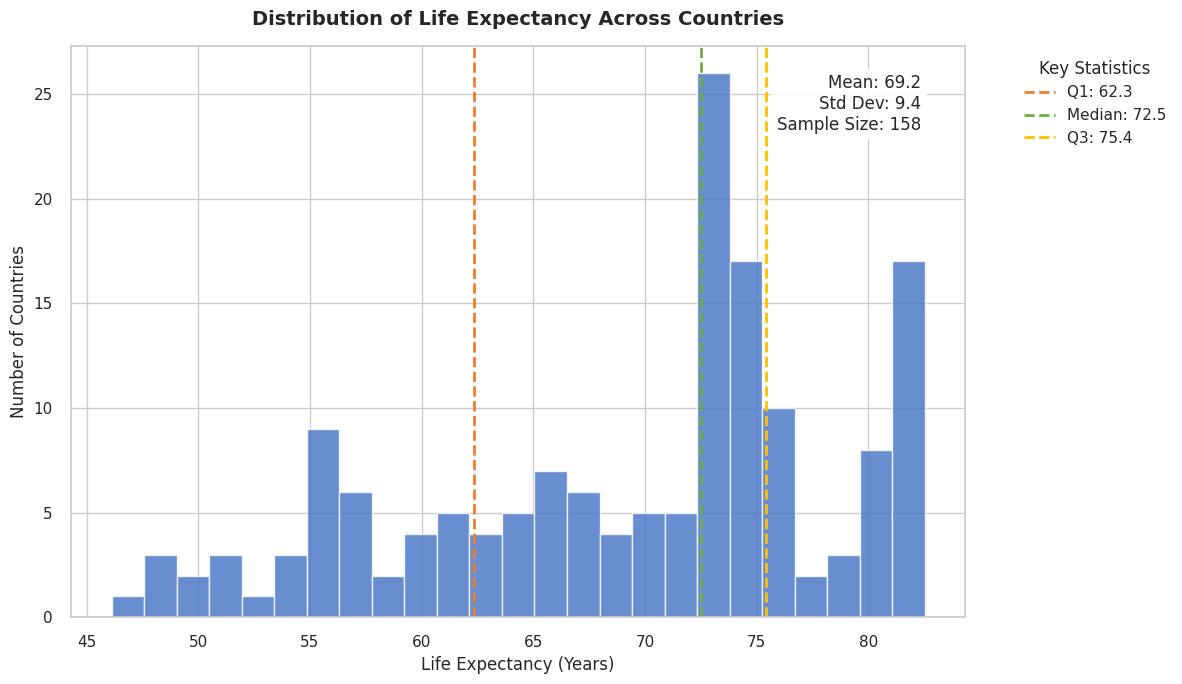

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style using a valid matplotlib style
plt.style.use('seaborn-v0_8')  # or use 'seaborn-darkgrid'

# Set figure aesthetics
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Create histogram with enhanced styling
plt.hist(life_expectancy, bins=25, color='#4472C4', edgecolor='white', alpha=0.8)

# Add vertical lines for quartiles with enhanced visibility
plt.axvline(life_expectancy_quartiles[0], color='#ED7D31', linestyle='--', linewidth=2, label=f'Q1: {life_expectancy_quartiles[0]:.1f}')
plt.axvline(life_expectancy_quartiles[1], color='#70AD47', linestyle='--', linewidth=2, label=f'Median: {life_expectancy_quartiles[1]:.1f}')
plt.axvline(life_expectancy_quartiles[2], color='#FFC000', linestyle='--', linewidth=2, label=f'Q3: {life_expectancy_quartiles[2]:.1f}')

# Add title and labels with professional formatting
plt.title('Distribution of Life Expectancy Across Countries', fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Life Expectancy (Years)', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)

# Add summary statistics
stats_text = (f'Mean: {life_expectancy.mean():.1f}\n'
             f'Std Dev: {life_expectancy.std():.1f}\n'
             f'Sample Size: {len(life_expectancy)}')
plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Enhance legend
plt.legend(title='Key Statistics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [10]:
country[country['Country'] == 'Pakistan']
# Pakistan Life Expectancy
pakistan_life_expectancy = country[country['Country'] == 'Pakistan']['Life Expectancy'].values[0]
print(f"Pakistan Life Expectancy: {pakistan_life_expectancy}")

Pakistan Life Expectancy: 64.5


In [11]:
japan_life_expectancy = country[country['Country'] == 'Japan']['Life Expectancy'].values[0]
print(f"Japan Life Expectancy: {japan_life_expectancy}")

Japan Life Expectancy: 82.5375


In [12]:
# 6.
# GDP is a mesaure of a country’s wealth. Let’s now use the GDP data to see if life expectancy is affected by this value.

# Let’s split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for “low GDP countries” and “high GDP countries.

# We can then compare the life expectancy of these two groups.
# Find the median GDP
median_gdp = country['GDP'].median()
print(f"Median GDP: {median_gdp}")

Median GDP: 2938.0781152500003


In [13]:
# Create two datasets based on GDP
low_gdp_countries = country[country['GDP'] < median_gdp]
high_gdp_countries = country[country['GDP'] >= median_gdp]
print(f"Low GDP Countries Count: {len(low_gdp_countries)}")
print(f"High GDP Countries Count: {len(high_gdp_countries)}")

Low GDP Countries Count: 79
High GDP Countries Count: 79


In [14]:
# Calculate life expectancy for both groups
low_gdp_life_expectancy = low_gdp_countries['Life Expectancy'].mean()
high_gdp_life_expectancy = high_gdp_countries['Life Expectancy'].mean()
print(f"Low GDP Life Expectancy: {low_gdp_life_expectancy}")
print(f"High GDP Life Expectancy: {high_gdp_life_expectancy}")

Low GDP Life Expectancy: 63.292273206751055
High GDP Life Expectancy: 75.20474683544305


In [15]:
np.median(country['GDP'])

np.float64(2938.0781152500003)

In [16]:
median_gdp = np.quantile(country['GDP'], 0.5)
print(f"Median GDP: {median_gdp}")

Median GDP: 2938.0781152500003


In [17]:
# 9.
# Now that we’ve split the data based on the GDP, let’s see how the life expectancy of each group compares to each other.

# Find the quartiles of the "Life Expectancy" column of low_gdp. Store the quartiles in a variable named low_gdp_quartiles. Print the results.
low_gdp_quartiles = np.quantile(low_gdp_countries['Life Expectancy'], [0.25, 0.5, 0.75])
print(f"Low GDP Quartiles: {low_gdp_quartiles}")

Low GDP Quartiles: [56.3375  64.34375 71.7375 ]


In [18]:
high_gdp_quartiles = np.quantile(high_gdp_countries['Life Expectancy'], [0.25, 0.5, 0.75])
print(f"High GDP Quartiles: {high_gdp_quartiles}")

High GDP Quartiles: [72.965625 75.15625  80.521875]


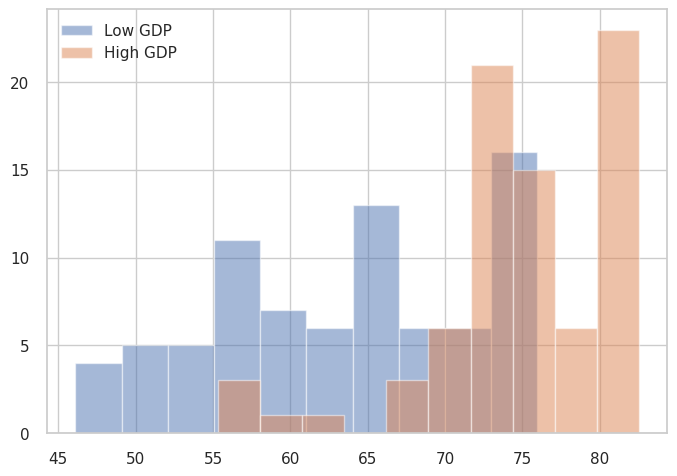

In [19]:
plt.hist(low_gdp_countries["Life Expectancy"], alpha = 0.5, label = "Low GDP")
plt.hist(high_gdp_countries["Life Expectancy"], alpha = 0.5, label = "High GDP")
plt.legend()
plt.show()

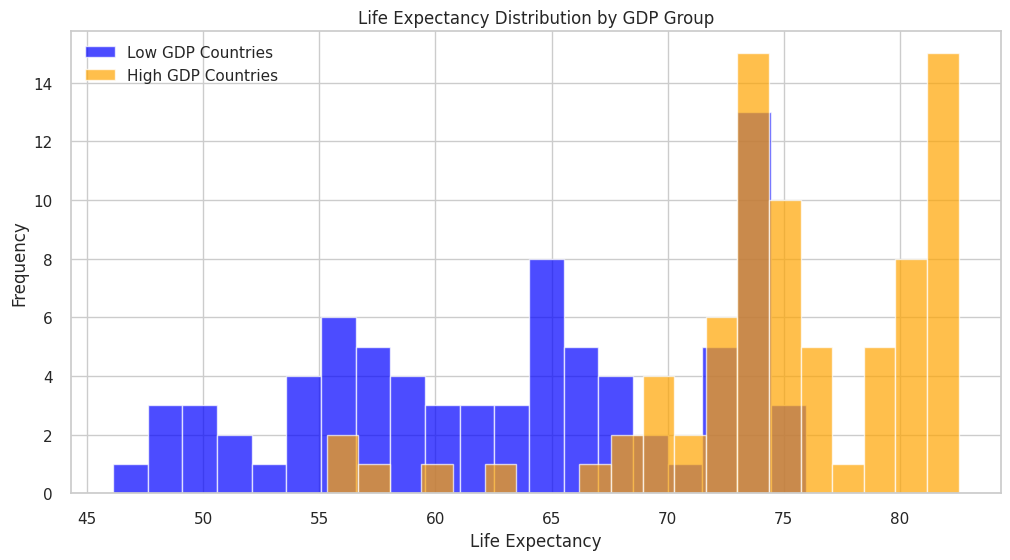

In [20]:
# Histogram and Conclusions
# 11.
# By looking at the quantiles, you should get a sense of the spread and central tendency of these two datasets. But let’s plot a histogram of each dataset to really compare them.
# Create a histogram of life expectancy for low GDP countries
plt.figure(figsize=(12, 6))
plt.hist(low_gdp_countries['Life Expectancy'], bins=20, color='blue', alpha=0.7, label='Low GDP Countries')
plt.hist(high_gdp_countries['Life Expectancy'], bins=20, color='orange', alpha=0.7, label='High GDP Countries')
plt.title('Life Expectancy Distribution by GDP Group')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

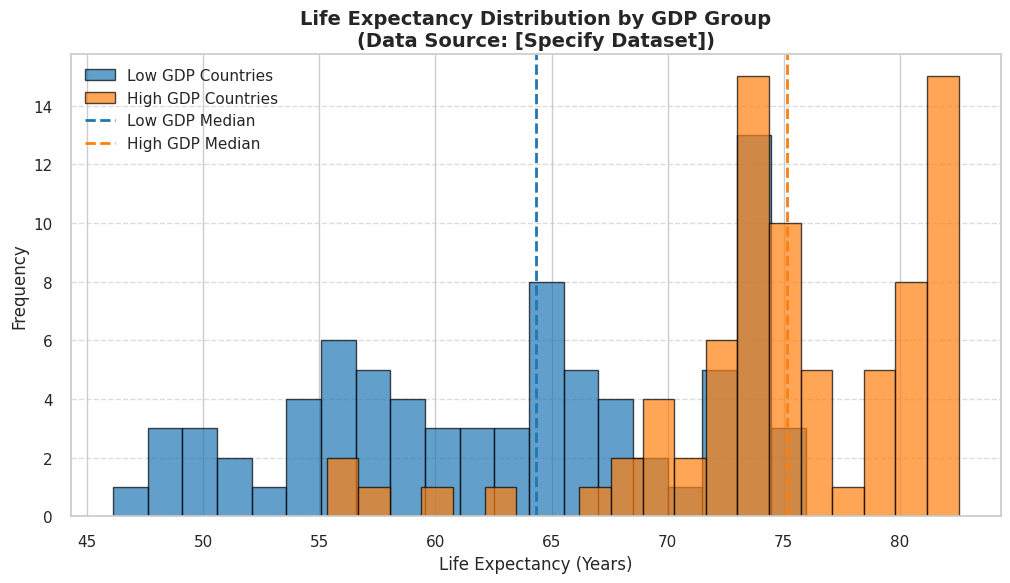

In [21]:
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 6))

# Plot histograms with enhanced styling
plt.hist(low_gdp_countries['Life Expectancy'], bins=20, color='#1f77b4', alpha=0.7, label='Low GDP Countries', edgecolor='black')
plt.hist(high_gdp_countries['Life Expectancy'], bins=20, color='#ff7f0e', alpha=0.7, label='High GDP Countries', edgecolor='black')

# Add median lines for clarity
plt.axvline(low_gdp_quartiles[1], color='#1f77b4', linestyle='dashed', linewidth=2, label='Low GDP Median')
plt.axvline(high_gdp_quartiles[1], color='#ff7f0e', linestyle='dashed', linewidth=2, label='High GDP Median')

# Labels and formatting
plt.title('Life Expectancy Distribution by GDP Group\n(Data Source: [Specify Dataset])', fontsize=14, fontweight='bold')
plt.xlabel('Life Expectancy (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot for reports
plt.savefig('life_expectancy_distribution.png', dpi=300, bbox_inches='tight')

plt.show()
